# Zomato data analysis project

# Step 1: Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# pandas is used for data mannipulation and analysis.
# numpy is used for numerical operations.
# matplotlib and seaborn is used for data visualization.

# Step 2: Create the dataframe

In [2]:
dataframe= pd.read_csv('Zomato data .csv')
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
dataframe.shape

(148, 7)

# Data cleaning

## Convert the data type of rate column. (eliminate /5 as it is common in all rows)

In [4]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

In [5]:
dataframe['rate']=dataframe['rate'].apply(handleRate)
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [16]:
# .apply() is a pandas function used to apply a function to each value in a DataFrame column (or row, in some cases).

In [6]:
# check if null values exists
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Type of restaurant

In [20]:
# countplot is a function in Seaborn (a data visualization library) used to show the counts of observations in each category of a categorical variable.

# Q1:  What type of restaurant do the majority of customers order from?

Text(0.5, 0, 'Type of restaurant')

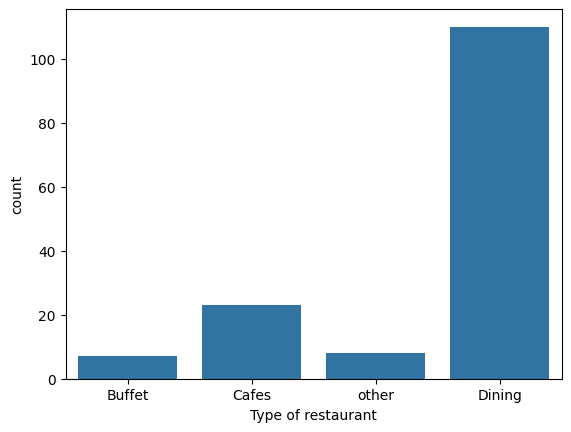

In [7]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel('Type of restaurant')

## Conclusion: Majority of the restaurants come under dining category.

# Q2:  How many votes has each type of restaurant received from customers?

In [8]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'votes')

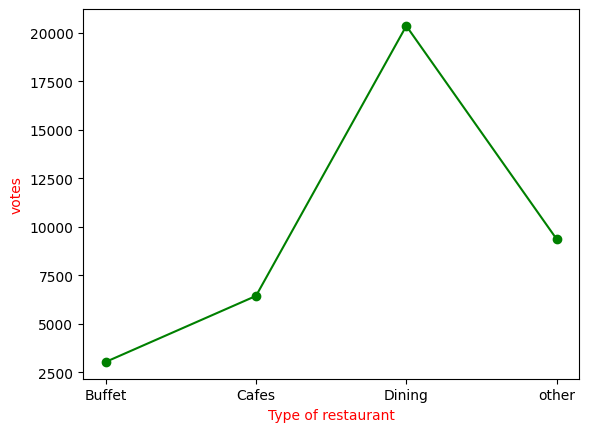

In [10]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=10)
plt.ylabel('votes', c='red', size=10)

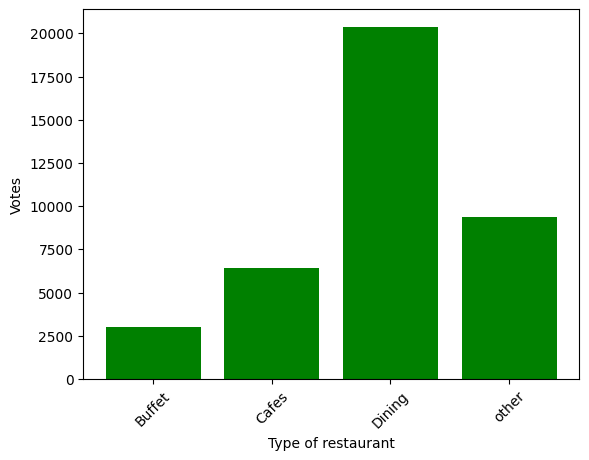

In [13]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
plt.bar(grouped_data.index, grouped_data.values, color='green')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()

In [14]:
# grouped_data.index

Index(['Buffet', 'Cafes', 'Dining', 'other'], dtype='object', name='listed_in(type)')

In [16]:
# grouped_data.values

array([ 3028,  6434, 20363,  9367], dtype=int64)

## Conclusion: Dining restaurant has received maximum votes

# Q3: What are the ratings that the majority of restaurants have received?

In [18]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


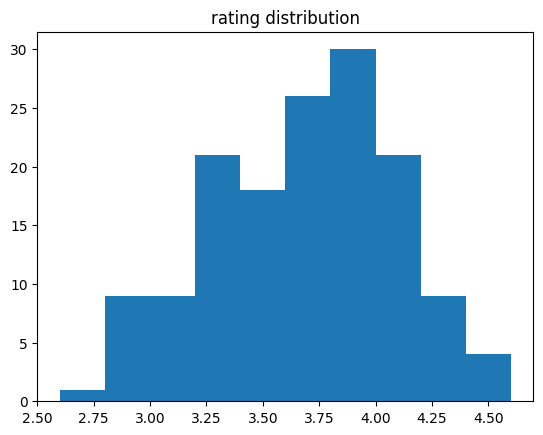

In [21]:
plt.hist(dataframe['rate'],bins=10)
plt.title('rating distribution')
plt.show()

## conclusion: the majority restaurants received rating from 3.5 to 4.

# Q4: Zomato has observed that most couples order most of their food online. What is their average spending on each order?

## Average order spending by couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

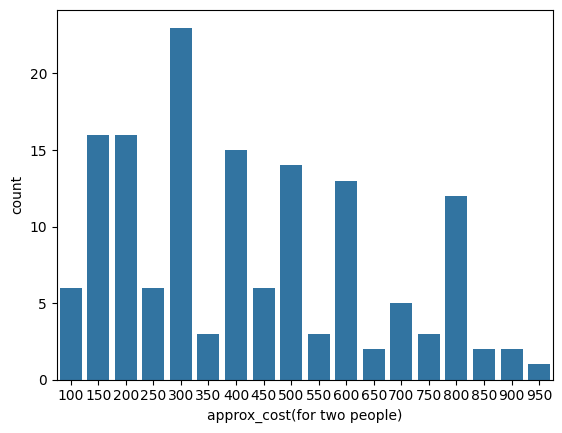

In [22]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

## conclusion: the majority of couples prefer restaurants with an approximate cost of 300 rupees.

# Q5: Which mode (online/offline) has received maximum rating?

In [25]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

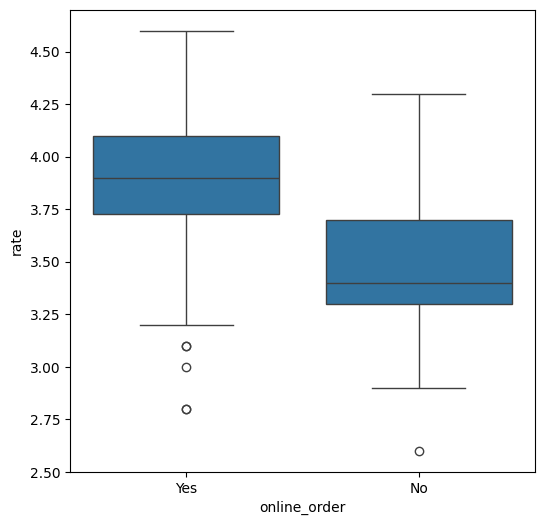

In [27]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=dataframe)

## conclusion: offline orders received lower ratings than online orders.

# Q6: Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers

In [ ]:
# Purpose:
# Creates a pivot table that counts how many restaurants of each type accept or don't accept online orders.

# index='listed_in(type)' → Groups by restaurant type.

# columns='online_order' → Separates data by whether they accept online orders (Yes or No).

# aggfunc='size' → Counts the number of records (like .groupby().size()).

# fill_value=0 → Fills missing values with 0.

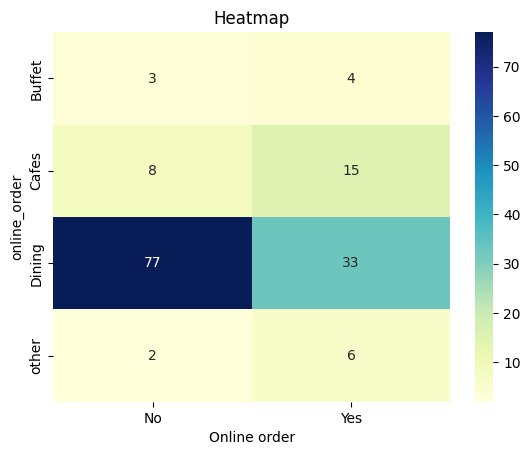

In [37]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel('Online order')
plt.ylabel('online_order')
plt.show()

In [30]:
# dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [39]:
# pivot_table

## Conclusion: Dining restaurants primarily receive offline orders, Cafes primarily receive online orders, This suggests that clients prefer orders in oerson at restaurants but prefer online at cafes.